# Health-care Data EDA
## Understand hidden information from your dataset 

In [53]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline

## Loading data 

In [2]:
health_gh_data = pd.read_csv("dataset/health-facilities-gh.csv")
health_tiers_data = pd.read_csv("dataset/health-facility-tiers.csv")

## Check data format and details

In [3]:
health_gh_data.head()

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude
0,Ashanti,Offinso North,A.M.E Zion Clinic,Clinic,Afrancho,CHAG,7.40801,-1.96317
1,Ashanti,Bekwai Municipal,Abenkyiman Clinic,Clinic,Anwiankwanta,Private,6.46312,-1.58592
2,Ashanti,Adansi North,Aboabo Health Centre,Health Centre,Aboabo No 2,Government,6.22393,-1.34982
3,Ashanti,Afigya-Kwabre,Aboabogya Health Centre,Health Centre,Aboabogya,Government,6.84177,-1.61098
4,Ashanti,Kwabre,Aboaso Health Centre,Health Centre,Aboaso,Government,6.84177,-1.61098


In [4]:
health_gh_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3756 entries, 0 to 3755
Data columns (total 8 columns):
Region          3756 non-null object
District        3756 non-null object
FacilityName    3756 non-null object
Type            3756 non-null object
Town            3603 non-null object
Ownership       3756 non-null object
Latitude        3732 non-null float64
Longitude       3732 non-null float64
dtypes: float64(2), object(6)
memory usage: 234.8+ KB


In [10]:
health_gh_data.nunique()

Region            10
District         171
FacilityName    3544
Type              25
Town            2446
Ownership         12
Latitude        2845
Longitude       2835
dtype: int64

In [11]:
health_gh_data.Region.unique()

array(['Ashanti', 'Brong Ahafo', 'Central', 'Eastern', 'Greater Accra',
       'Northern', 'Upper East', 'Upper West', 'Volta', 'Western'],
      dtype=object)

In [24]:
health_gh_data.describe()
#health_gh_data.describe().transpose()
#health_gh_data.describe(include=['object']).transpose()


,Latitude,Longitude
count,3732.000000,3732.000000
mean,6.955678,-1.074580
std,1.679332,1.021352
min,4.796180,-3.235880
25%,5.687642,-1.809792
50%,6.468705,-1.058117
75%,7.430555,-0.215870
max,11.146670,1.191440


In [27]:
health_gh_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Latitude,3732.0,6.955678,1.679332,4.79618,5.687642,6.468705,7.430555,11.14667
Longitude,3732.0,-1.074580,1.021352,-3.23588,-1.809792,-1.058117,-0.215870,1.19144


In [25]:
health_gh_data.describe(include=['object']).transpose()

,count,unique,top,freq
Region,3756,10,Ashanti,658
District,3756,171,Accra Metropolitan,277
FacilityName,3756,3544,Rabito Clinic,11
Type,3756,25,Clinic,1171
Town,3603,2446,Sunyani,29
Ownership,3756,12,Government,2210


In [15]:
health_gh_data.isnull().sum()

Region            0
District          0
FacilityName      0
Type              0
Town            153
Ownership         0
Latitude         24
Longitude        24
dtype: int64

In [16]:
#we can also use isna to check null values
health_gh_data.isna().sum()

Region            0
District          0
FacilityName      0
Type              0
Town            153
Ownership         0
Latitude         24
Longitude        24
dtype: int64

In [44]:
# we have null values in Town , Latitude and Longitude 
# lets process the null values
# we can fill Town as "No-Town" values
health_gh_data['Town'].fillna("No-Town",inplace=True)


In [46]:
# we cant change Latitude and Longitude as 0,0 because it may change our mean ,SD values 
health_gh_data.isnull().sum()

Region           0
District         0
FacilityName     0
Type             0
Town             0
Ownership        0
Latitude        24
Longitude       24
dtype: int64

## Get some insights from dataset

In [47]:
health_gh_data.columns

Index(['Region', 'District', 'FacilityName', 'Type', 'Town', 'Ownership',
       'Latitude', 'Longitude'],
      dtype='object')

In [60]:
region_groups = health_gh_data.groupby(['Region'])['Region'].count().reset_index(name = "count")

In [61]:
region_groups

,Region,count
0,Ashanti,658
1,Brong Ahafo,348
2,Central,299
3,Eastern,393
4,Greater Accra,504
5,Northern,267
6,Upper East,232
7,Upper West,161
8,Volta,398
9,Western,496


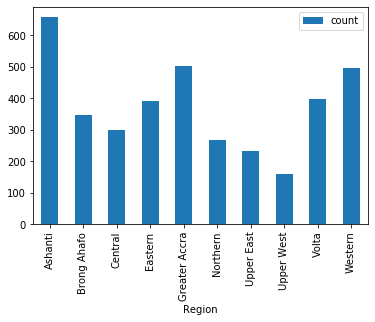

In [86]:
region_groups.plot.bar(x = 'Region',y = 'count')

In [72]:
list(region_groups['Region'])

['Ashanti',
 'Brong Ahafo',
 'Central',
 'Eastern',
 'Greater Accra',
 'Northern',
 'Upper East',
 'Upper West',
 'Volta',
 'Western']